Balaji Kartheek (200968080)

### Importing the libraries

In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing   # Using the Scikit-Learn’s fetch_california_housing() function
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = fetch_california_housing(as_frame = True)    

In [ ]:
df = df.frame     # getting data as a dataframe 

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Distribution of the attributes

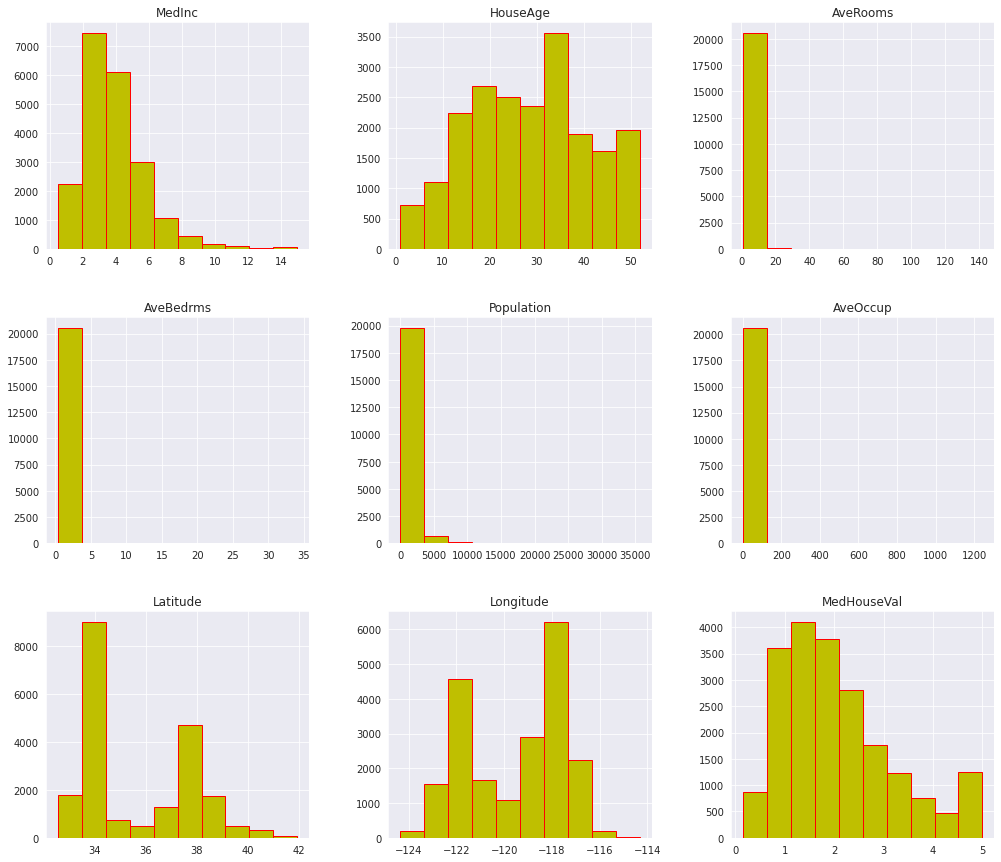

In [ ]:
df.hist(figsize = (17,15),color = 'y',edgecolor = 'r')
plt.show()

In [ ]:
x = df.drop('MedHouseVal',axis =1)
y = df.MedHouseVal            # target variable

In [ ]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
cols = x.columns

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

# Stadardization

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x,columns = cols)
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


## TrainTest Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

### Using the sequential API build a regression MLP ( to make predications. Model can have 1 hidden layer with 30 units. Visualize the MSE for 20 epochs. Comment on overall accuracy.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

In [ ]:
# compile the model

model.compile(loss = tf.losses.mean_squared_error,optimizer = 'sgd')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                270       
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
325/325 [==============================] - 1s 2ms/step - loss: 0.8347 - val_loss: 0.8391
Epoch 2/20
325/325 [==============================] - 0s 1ms/step - loss: 0.5416 - val_loss: 0.6490
Epoch 3/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4852 - val_loss: 0.6007
Epoch 4/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4597 - val_loss: 0.5087
Epoch 5/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4437 - val_loss: 0.4593
Epoch 6/20
325/325 [==============================] - 0s 2ms/step - loss: 0.4317 - val_loss: 0.4382
Epoch 7/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4269 - val_loss: 0.4775
Epoch 8/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4178 - val_loss: 0.4411
Epoch 9/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4136 - val_loss: 0.4230
Epoch 10/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4046 - val_loss: 0.4074

In [ ]:
model.evaluate(X_test,y_test)

213/213 [==============================] - 0s 836us/step - loss: 0.3959


0.39593392610549927

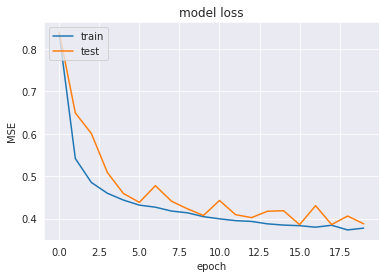

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Using functional API build the following Wide & Deep Neural Network with the following architecture.

### Let Hidden layers contain 30 units each with ReLU activation. Pass features 0 to 4 in the wide path and features 2 to 7 into the deep path. Visualize the MSE for 20 epochs. Comment on overall accuracy

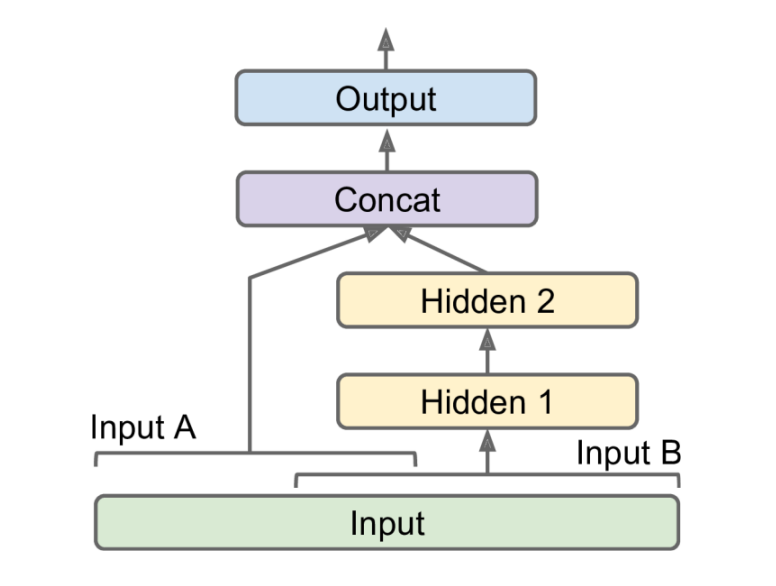

In [ ]:
input_a = tf.keras.layers.Input(shape = [5], name = 'wide_input')   # features from 0 to 4
input_b = tf.keras.layers.Input(shape = [6], name = 'deep_input')   # features from 2 to 7
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(input_b)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([input_a, hidden2])
output = tf.keras.layers.Dense(1, name = 'output')(concat)

In [ ]:
model2 = tf.keras.Model(inputs = [input_a, input_b], outputs = [output])

In [ ]:
model2.compile(loss = tf.losses.mean_squared_error,
             optimizer = tf.keras.optimizers.SGD())

In [ ]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_26 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 30)           930         ['dense_26[0][0]']               
                                                                                            

In [ ]:
# X_train,X_test, X_valid all columns are indexing from 0 to 7

x_train_a, x_train_b = X_train.iloc[:, :5], X_train.iloc[:, 2:]
x_validation_a, x_validation_b = X_valid.iloc[:, :5], X_valid.iloc[:, 2:]
x_test_a, x_test_b = X_test.iloc[:, :5], X_test.iloc[:, 2:]

In [ ]:
history2 = model2.fit((x_train_a, x_train_b), y_train, epochs=20, validation_data=((x_validation_a, x_validation_b), y_valid))

Epoch 1/20
325/325 [==============================] - 1s 2ms/step - loss: 0.8767 - val_loss: 1.7436
Epoch 2/20
325/325 [==============================] - 0s 1ms/step - loss: 0.6703 - val_loss: 1.0708
Epoch 3/20
325/325 [==============================] - 0s 1ms/step - loss: 0.5457 - val_loss: 0.4954
Epoch 4/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4870 - val_loss: 0.4714
Epoch 5/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4663 - val_loss: 0.4516
Epoch 6/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4550 - val_loss: 0.4446
Epoch 7/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4361 - val_loss: 0.4286
Epoch 8/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4266 - val_loss: 0.4255
Epoch 9/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4178 - val_loss: 0.4161
Epoch 10/20
325/325 [==============================] - 0s 1ms/step - loss: 0.4086 - val_loss: 0.4015

In [ ]:
mean_squared_error_test = model2.evaluate((x_test_a, x_test_b), y_test)
print(mean_squared_error_test)

213/213 [==============================] - 0s 867us/step - loss: 0.3633
0.3633024990558624


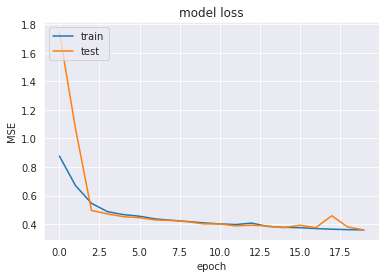

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("loss of the sequential model: ",model.evaluate(X_test,y_test))
print("loss of the functional model: ",mean_squared_error_test)

213/213 [==============================] - 0s 801us/step - loss: 0.3959
loss of the sequential model:  0.39593392610549927
loss of the functional model:  0.3633024990558624


### from the above two models model developed with functional API is performing better than the sequential API.